In [1]:
import pandas as pd
import pathlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from typing import Tuple

In [2]:
input_file = str(pathlib.Path.home()) + '/data/log_truth_merge_rootfile/truthMatchedDaVinciLog.h5'

save_plots = True

In [3]:
## Create plots directory, if missing
plots_dir = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_truth_matched_davinci_logs/'
                  + 'true_vertex_study/'
)
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True)

In [4]:
converged_color = 'tab:blue'
failed_color = 'tab:orange'

# Import data

In [5]:
df_events = pd.read_hdf(input_file, key='LHCbMC_Lb')

In [6]:
df_events

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,0.979173,-0.239833,-64.816292,117.773293,81.120241,4519.532659,0.9792,-0.2400,-64.8159,799.747710,...,2.458510e+04,2.483510e+04,180.2400,4966.020,5.017570e+03,1.732910e+05,1.750500e+05,176826.0,0,0.000041
1,1.093603,-0.730310,-118.496924,409.637282,-482.388914,5243.766056,1.0936,-0.7303,-118.4970,4641.039788,...,-4.844530e+04,-4.891540e+04,3319.0200,-37491.200,-3.786050e+04,4.327000e+05,4.368900e+05,441121.0,7,0.000030
2,0.503910,-1.401719,34.398241,17.321301,-438.571736,6586.978362,0.5173,-1.3766,33.9172,674.138940,...,-5.029840e+03,-5.048350e+03,595.4900,-7075.120,-7.106230e+03,9.652280e+04,9.687550e+04,97229.8,11,0.000034
3,0.916428,-0.217192,-75.509620,266.983693,-325.565867,6387.654927,0.9231,-0.2172,-75.4493,6551.396422,...,1.372040e+04,1.374210e+04,3846.9300,-66023.900,-6.613470e+04,1.169790e+06,1.171640e+06,1173490.0,13,0.000039
4,0.493800,0.839399,12.045894,-626.807055,436.644907,4474.800409,0.4938,0.8394,12.0459,-256.424218,...,-1.614400e+05,-1.834040e+05,2402.1300,26734.000,3.037290e+04,3.026830e+05,3.438550e+05,390631.0,17,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.092030,-0.745575,68.107730,315.891858,-58.192833,5056.162638,1.1019,-0.7389,67.9972,4932.547051,...,-2.085870e+03,-2.124090e+03,12.8123,-293.285,-2.987730e+02,1.050310e+04,1.069420e+04,10888.9,431,26.233487
121,1.102658,-0.736338,67.980577,553.231952,-109.811656,8622.074822,1.1019,-0.7389,67.9972,480.925845,...,-7.604910e+01,-7.603710e+01,9.2567,-3.611,-3.618250e+00,2.082420e+03,2.082010e+03,2081.6,1034,22.826089
122,1.102658,-0.736338,67.980577,553.231952,-109.811656,8622.074822,1.1019,-0.7389,67.9972,480.925845,...,-9.437790e+03,-9.734890e+03,12.8072,-270.140,-2.787810e+02,3.683790e+04,3.799460e+04,39187.8,801,31.491108
123,0.759246,-0.783205,68.533907,-20.006221,-456.343834,6363.973976,0.7591,-0.7829,68.5325,-4289.573985,...,2.821250e+06,2.826850e+06,525617.0000,-8721530.000,-8.738940e+06,1.451330e+08,1.454210e+08,145709000.0,1040,0.000040


# Helper functions

In [7]:
def plot_overlapping_histos(
    df: pd.DataFrame, ## Full DataFrame
    series: pd.Series, ## Series built from df columns. May be a column itself
    axis_label: str,
    plot_title: str,
    file_name: str,
    binning: int,
    boundaries: Tuple[float],
    log_scale: bool = False,
    scientific_notation: bool = False,
    normalized: bool = True
):
    ## Converged events
    plt.hist(
        series.loc[df['status'] == 'Converged'],
        bins=binning,
        range=boundaries,
        label="Converged",
        histtype='stepfilled',
        edgecolor=converged_color,
        color=mcolors.to_rgba(converged_color, alpha=0.05),
        density=normalized
    )
    
    ## Failed
    plt.hist(
        series.loc[df['status'] == 'NonConverged'],
         bins=binning,
         range=boundaries,
         label="Failed",
         histtype='stepfilled',
         edgecolor=failed_color,
         color=mcolors.to_rgba(failed_color, alpha=0.05),
         density=normalized
    )
    
    plt.grid()
    plt.xlabel(axis_label)
    plt.title(plot_title)
    
    if log_scale:
        plt.yscale('log')

    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

# Study the vertex seed
Now with truth match!

In [8]:
feature_boundary_dictionary = {
    'seed_vtx_X': (-1000,1000),
    'seed_vtx_Y': (-2000,2000),
    'seed_vtx_Z': (-15000,10000),
}

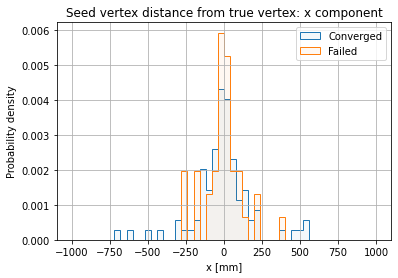

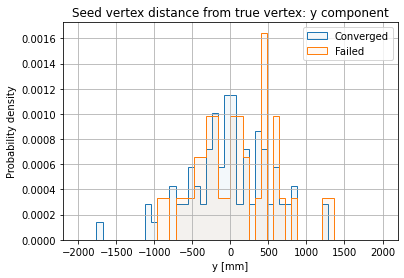

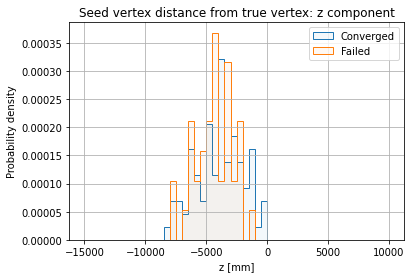

In [9]:
for comp in ['x', 'y', 'z']:
    seed_feature = 'seed_vtx_' + comp.upper()
    true_feature = 'MCTRUTH_L_ENDVERTEX_' + comp.upper()

    plot_args = {
        'axis_label': comp + ' [mm]',
        'plot_title': 'Seed vertex distance from true vertex: ' + comp + " component",
        'file_name': seed_feature,
        'binning': 50,
        'boundaries': feature_boundary_dictionary[seed_feature],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True    
    }

    plot_overlapping_histos(
        df_events,
        df_events['seed_vtx_X'] - df_events[true_feature],
        **plot_args)

# Plot event topology

In [10]:
coord_to_vector_comp = {
    'x': 0,
    'y': 1,
    'z': 2
}

coord_to_suffix = {
    'x': '_X',
    'y': '_Y',
    'z': '_Z'
}

coord_to_boundaries = {
    'x': (-2000,2000),
    'y': (-2000,2000),
    'z': (0,9000)
}

In [11]:
def plot_event_plane(
    df: pd.DataFrame,
    event_index: int,
    x_axis: str,
    y_axis: str,
    tight_axes: bool = False,
    show_arrows: bool = True,
    show_true_vertex: bool = True
) -> None:
    %matplotlib inline
    
    fig = plt.figure()
    ax = plt.axes()
    
    event = df.iloc[event_index]
    
    x_comp = coord_to_vector_comp[x_axis]
    y_comp = coord_to_vector_comp[y_axis]
    
    ## Note: initial values are broken down in single columns (1 per component).
    ## Iteration values are not (atm). Hence two different techniques.
    vertices = []
    vertices.append([
        event['seed_vtx' + coord_to_suffix[x_axis]],
        event['seed_vtx' + coord_to_suffix[y_axis]]
    ])
    vertices += [[vtx[x_comp], vtx[y_comp]] for vtx in event['iter_currentVertices']]
    
    p_refpoints = []
    p_refpoints.append([
        event['p_refPoint' + coord_to_suffix[x_axis]],
        event['p_refPoint' + coord_to_suffix[y_axis]]
    ])
    p_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_p_refPoint']]
    
    pim_refpoints = []
    pim_refpoints.append([
        event['pim_refPoint' + coord_to_suffix[x_axis]],
        event['pim_refPoint' + coord_to_suffix[y_axis]]
    ])
    pim_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_pim_refPoint']]
    
    ax.plot(*zip(*vertices), color='black', marker='x', linestyle='--', label='Vertex')
    ax.plot(*zip(*p_refpoints), color='tab:red', marker='+', linestyle='-', label='Proton')
    ax.plot(*zip(*pim_refpoints), color='tab:blue', marker='+', linestyle='-', label='Pion')
    
    if show_arrows:
        p_momenta = []
        p_momenta.append([
            event['p_momentum' + coord_to_suffix[x_axis]],
            event['p_momentum' + coord_to_suffix[y_axis]]
        ])
        p_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_p_momentum']]
        
        pim_momenta = []
        pim_momenta.append([
            event['pim_momentum' + coord_to_suffix[x_axis]],
            event['pim_momentum' + coord_to_suffix[y_axis]]
        ])
        pim_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_pim_momentum']]
        
        ax.quiver(*zip(*p_refpoints), *zip(*p_momenta), color='tab:red')
        ax.quiver(*zip(*pim_refpoints), *zip(*pim_momenta), color='tab:blue')
        
    if show_true_vertex:
        mew = 1.5
        
        ax.plot(
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[x_axis]],
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[y_axis]],
            color='tab:green',
            label='True vertex',
            marker='+',
            markersize=10,
            mew=mew,
            linestyle=''
        )
        
        ax.plot(
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[x_axis]],
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[y_axis]],
            color='tab:green',
            marker='+',
            markersize=100,
            mew=mew,
            linestyle=''
        )
        
    ax.set_xlabel(x_axis + " [mm]")
    ax.set_ylabel(y_axis + " [mm]")
    ax.grid()
    ax.set_title("Event " + str(event_index) + " (" + event['status'] + ")\n$" + x_axis + y_axis + "$ plane topology")
    
    if not tight_axes:
        ax.set_xlim(coord_to_boundaries[x_axis])
        ax.set_ylim(coord_to_boundaries[y_axis])
        
    ax.legend(loc='best')
    
    if save_plots:
        file_name = 'evt_' + str(event_index) + '_' + x_axis + y_axis
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

In [12]:
def plot_all_event_planes(
    df: pd.DataFrame,
    event_index: int,
    tight_axes: bool = False,
    show_arrows: bool = True,
    show_true_vertex: bool = True
) -> None:
    plot_event_plane(df, event_index,'x','y', tight_axes=tight_axes, show_arrows=show_arrows, show_true_vertex=show_true_vertex)
    plot_event_plane(df, event_index,'z','x', tight_axes=tight_axes, show_arrows=show_arrows, show_true_vertex=show_true_vertex)
    plot_event_plane(df, event_index,'z','y', tight_axes=tight_axes, show_arrows=show_arrows, show_true_vertex=show_true_vertex)
    
    #PlotEvent3DPlane(index, interactive=False, tightAxes=tightAxes, showArrows=showArrows)

In [13]:
df_events.loc[df_events['status'] == 'NonConverged'].index

Int64Index([  0,   2,   3,   8,  11,  12,  14,  17,  18,  23,  28,  32,  33,
             35,  42,  44,  47,  56,  59,  61,  70,  75,  76,  82,  83,  87,
             89, 100, 102, 105, 107, 110, 116, 117, 118, 121, 122, 124],
           dtype='int64')

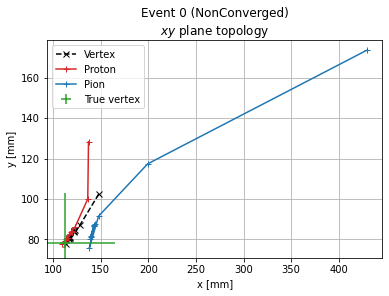

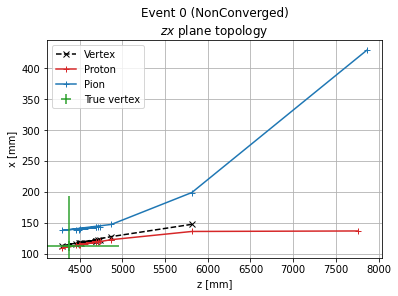

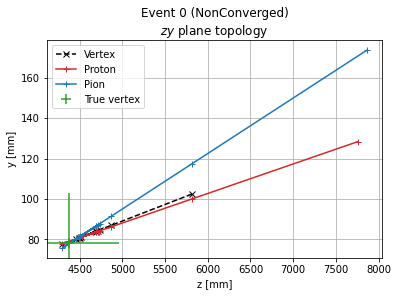

In [14]:
plot_all_event_planes(df_events, 0, tight_axes=True, show_arrows=False, show_true_vertex=True)

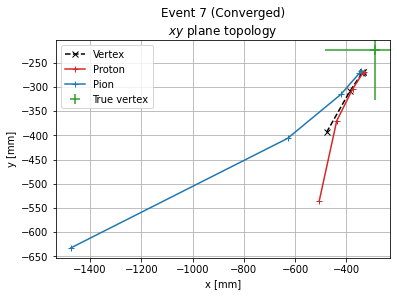

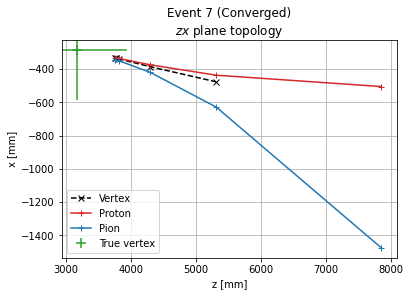

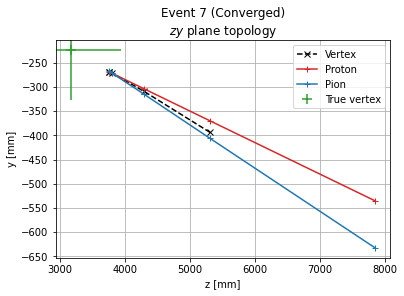

In [15]:
plot_all_event_planes(df_events, 7, tight_axes=True, show_arrows=False, show_true_vertex=True)

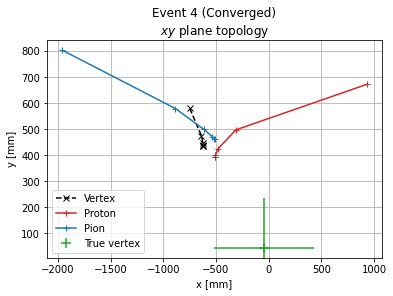

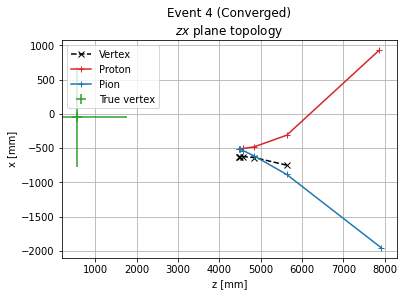

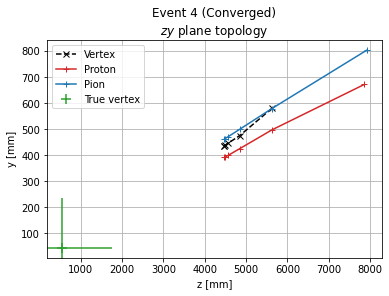

In [16]:
plot_all_event_planes(df_events, 4, tight_axes=True, show_arrows=False, show_true_vertex=True)

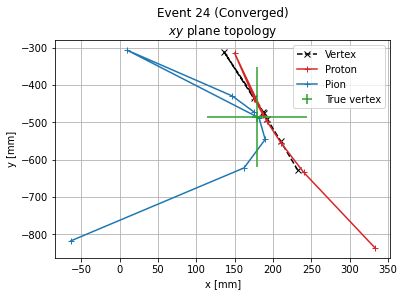

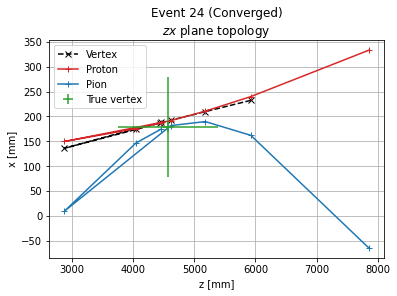

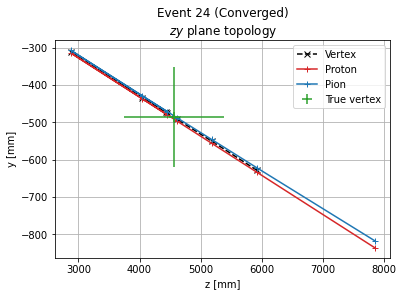

In [17]:
plot_all_event_planes(df_events, 24, tight_axes=True, show_arrows=False, show_true_vertex=True)